In [623]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [624]:
soil_data = pd.read_csv('stuard_soil_data.csv')
env_data = pd.read_csv('stuard_environmental_data.csv')


## Preprocessing Soil Data

In [625]:
soil_data.head()

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature,battery
0,32299,1688047456101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.9,29.1,NaN
1,32309,1688048057491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.9,29,NaN
2,32319,1688048658856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.74,29,NaN
3,32329,1688049260229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,722,31.74,29,NaN
4,32348,1688050462965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.61,28.9,NaN


In [626]:
soil_data.describe()

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature,battery
count,32668,32668,32668,32668,32668,32668,32668,228
unique,32667,32667,4,4,1393,646,132,3
top,id,ts_generation,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1,141,20.59,23.2,100
freq,2,2,10966,10966,476,337,850,207


In [627]:
# Dropping columns
soil_data = soil_data.drop("battery", axis=1)

In [628]:
soil_data

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature
0,32299,1688047456101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.9,29.1
1,32309,1688048057491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.9,29
2,32319,1688048658856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.74,29
3,32329,1688049260229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,722,31.74,29
4,32348,1688050462965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2,723,31.61,28.9
...,...,...,...,...,...,...,...
32663,210003,1694639939977,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1,139,23.29,23.4
32664,210020,1694640541323,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1,139,23.29,23.4
32665,210036,1694641142688,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1,139,23.29,23.4
32666,210055,1694641744068,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1,139,23.29,23.4


In [629]:
# Verifying data types
soil_data.dtypes

id                         object
ts_generation              object
device_identifier          object
line                       object
electrical_conductivity    object
humidity                   object
temperature                object
dtype: object

In [630]:
#soil_data['ts_generation']  = pd.to_numeric(soil_data['ts_generation'], errors="coerce").astype(int)

In [631]:
soil_data['ts_generation']

0        1688047456101
1        1688048057491
2        1688048658856
3        1688049260229
4        1688050462965
             ...      
32663    1694639939977
32664    1694640541323
32665    1694641142688
32666    1694641744068
32667    1694642345445
Name: ts_generation, Length: 32668, dtype: object

In [632]:
# Converting Objects to numerical values

soil_data_numerical_columns = ['line', 'electrical_conductivity', 'humidity', 'temperature']

for column in soil_data_numerical_columns:
   
    soil_data[column] = pd.to_numeric(soil_data[column], errors="coerce")

In [633]:
soil_data.dtypes

id                          object
ts_generation               object
device_identifier           object
line                       float64
electrical_conductivity    float64
humidity                   float64
temperature                float64
dtype: object

In [634]:
# Checking for null values
soil_data_null_counts = soil_data.isnull().sum()
print(soil_data_null_counts)

id                         0
ts_generation              0
device_identifier          0
line                       2
electrical_conductivity    2
humidity                   2
temperature                2
dtype: int64


In [635]:
# Dropping null values
soil_data.dropna(inplace=True)

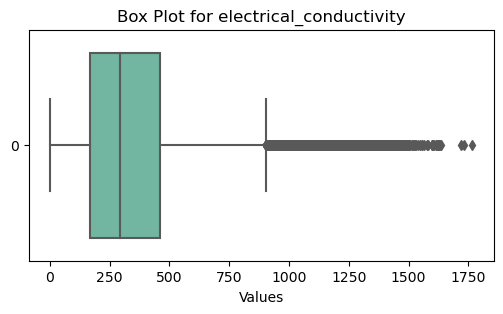

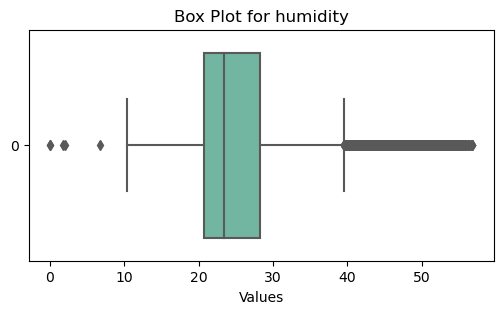

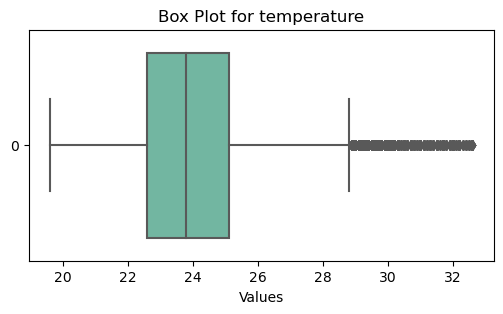

In [636]:
# Visualising outliers
for column in soil_data_numerical_columns:
    if column != 'line':
        plt.figure(figsize=(6, 3))
        sns.boxplot(data=soil_data[column], orient="h", palette="Set2")
        plt.title("Box Plot for "+ column)
        plt.xlabel("Values")
        plt.show()

In [637]:
# Identifying the number of outliers
soil_data_z_scores = soil_data.iloc[:, 4:].apply(zscore)
soil_data_outliers = (soil_data_z_scores.abs() > 3)

soil_data_outlier_counts = soil_data_outliers.sum()
print(soil_data_outlier_counts)


electrical_conductivity    521
humidity                   689
temperature                192
dtype: int64


In [638]:
# Dropping rows with outliers
#soil_data.drop(soil_data[soil_data_outliers.any(axis=1)].index, inplace=True)

In [639]:
#soil_data.describe()

# Preprocessing Environmental Data

In [640]:
env_data.head()

,id,device_identifier,ts_generation,co2,humidity,pressure,temperature,battery
0,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688019286484,635,61.0,1010.7,24.5,NaN
1,32234,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688043749456,472,39.5,1010.9,41.2,100.0
2,32243,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044308221,467,46.0,1010.8,40.2,NaN
3,32254,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044908191,463,38.0,1010.6,39.7,NaN
4,32264,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688045508203,436,35.0,1010.6,39.4,NaN


In [641]:
env_data.describe()

,id,ts_generation,co2,humidity,pressure,temperature,battery
count,10964.000000,1.096400e+04,10964.000000,10964.000000,10964.000000,10964.000000,75.0
mean,114768.658428,1.691341e+12,481.347136,58.067813,1009.799124,26.917448,100.0
std,53784.311226,1.905136e+09,48.022433,18.223453,5.248676,7.234632,0.0
min,70.000000,1.688019e+12,396.000000,18.000000,993.700000,10.100000,100.0
25%,68729.250000,1.689691e+12,448.000000,42.500000,1006.700000,20.800000,100.0
50%,111651.500000,1.691339e+12,470.000000,57.250000,1010.500000,26.100000,100.0
75%,162168.500000,1.692990e+12,503.000000,74.000000,1013.600000,33.100000,100.0
max,210060.000000,1.694642e+12,858.000000,97.000000,1019.400000,43.700000,100.0


In [642]:
# Dropping columns
env_columns_to_drop = ["battery", "co2", "pressure"]
env_data = env_data.drop(env_columns_to_drop, axis=1)

In [643]:
env_data

,id,device_identifier,ts_generation,humidity,temperature
0,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688019286484,61.0,24.5
1,32234,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688043749456,39.5,41.2
2,32243,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044308221,46.0,40.2
3,32254,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044908191,38.0,39.7
4,32264,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688045508203,35.0,39.4
...,...,...,...,...,...
10959,209990,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694639485190,81.0,20.4
10960,210008,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694640086859,82.0,20.2
10961,210025,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694640685110,83.0,20.2
10962,210042,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694641285092,83.0,20.1


In [644]:
# Verifying data types
env_data.dtypes

id                     int64
device_identifier     object
ts_generation          int64
humidity             float64
temperature          float64
dtype: object

In [645]:
# Checking for null values
env_data_null_counts = env_data.isnull().sum()
print(env_data_null_counts)

id                   0
device_identifier    0
ts_generation        0
humidity             0
temperature          0
dtype: int64


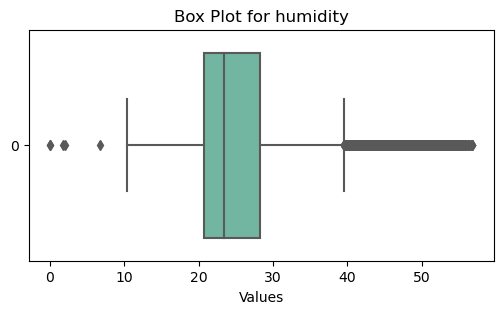

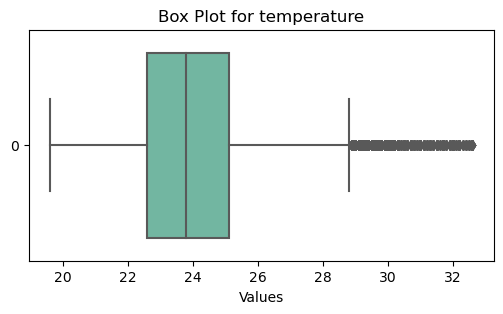

In [646]:
env_data_numerical_columns = ['humidity', 'temperature']
for column in env_data_numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=soil_data[column], orient="h", palette="Set2")
    plt.title("Box Plot for "+ column)
    plt.xlabel("Values")
    plt.show()

In [647]:
# Identifying the number of outliers
env_data_z_scores = env_data.iloc[:, 3:].apply(zscore)
env_data_outliers = (env_data_z_scores.abs() > 3)

env_data_outlier_counts = env_data_outliers.sum()
print(env_data_outlier_counts)

humidity       0
temperature    0
dtype: int64


In [648]:
env_data

,id,device_identifier,ts_generation,humidity,temperature
0,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688019286484,61.0,24.5
1,32234,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688043749456,39.5,41.2
2,32243,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044308221,46.0,40.2
3,32254,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688044908191,38.0,39.7
4,32264,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1688045508203,35.0,39.4
...,...,...,...,...,...
10959,209990,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694639485190,81.0,20.4
10960,210008,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694640086859,82.0,20.2
10961,210025,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694640685110,83.0,20.2
10962,210042,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,1694641285092,83.0,20.1


## Merging Data

In [649]:
soil_data['line'].unique()

array([2., 3., 1.])

In [650]:
# Checking if the ids overlap

common_ids = soil_data['id'].isin(env_data['id'])

# Display common ids and their count
print(f"Number of common IDs: {common_ids.sum()}")
print(f"Common IDs: {soil_data[common_ids]['id']}")

Number of common IDs: 0
Common IDs: Series([], Name: id, dtype: object)


In [651]:
# Convert ts_generation to datetime format
soil_data['ts_generation'] = pd.to_datetime(soil_data['ts_generation'], unit='ms')
env_data['ts_generation'] = pd.to_datetime(env_data['ts_generation'], unit='ms')

# Merge the datasets on 'ts_generation'
combined_data = pd.merge_asof(soil_data.sort_values('ts_generation'),
                              env_data.sort_values('ts_generation'),
                              on='ts_generation',
                              suffixes=('_soil', '_env'),
                              direction='nearest')


# Display the combined dataset
combined_data

,id_soil,ts_generation,device_identifier_soil,line,electrical_conductivity,humidity_soil,temperature_soil,id_env,device_identifier_env,humidity_env,temperature_env
0,31599,2023-06-28 22:09:25.881,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,373.0,30.78,24.8,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,61.0,24.5
1,31606,2023-06-28 22:19:27.229,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,372.0,30.78,24.8,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,61.0,24.5
2,31613,2023-06-28 22:29:28.584,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,371.0,30.71,24.7,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,61.0,24.5
3,31620,2023-06-28 22:39:29.970,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,377.0,30.71,24.7,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,61.0,24.5
4,31627,2023-06-28 22:49:31.332,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,374.0,30.64,24.6,31938,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,61.0,24.5
...,...,...,...,...,...,...,...,...,...,...,...
32661,210049,2023-09-13 21:45:10.846,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,157.0,20.55,23.6,210042,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,83.0,20.1
32662,210055,2023-09-13 21:49:04.068,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4,210060,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,84.0,20.0
32663,210064,2023-09-13 21:53:36.750,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.49,24.0,210060,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,84.0,20.0
32664,210067,2023-09-13 21:55:12.206,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,157.0,20.55,23.6,210060,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,84.0,20.0


In [652]:
soil_data

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature
0,32299,2023-06-29 14:04:16.101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.1
1,32309,2023-06-29 14:14:17.491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.0
2,32319,2023-06-29 14:24:18.856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.74,29.0
3,32329,2023-06-29 14:34:20.229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,722.0,31.74,29.0
4,32348,2023-06-29 14:54:22.965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.61,28.9
...,...,...,...,...,...,...,...
32663,210003,2023-09-13 21:18:59.977,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32664,210020,2023-09-13 21:29:01.323,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32665,210036,2023-09-13 21:39:02.688,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32666,210055,2023-09-13 21:49:04.068,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4


In [653]:
env_data.iloc[10950:11000,:]

,id,device_identifier,ts_generation,humidity,temperature
10950,209829,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 19:41:25.439,67.5,22.0
10951,209847,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 19:51:25.417,68.0,21.6
10952,209863,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:01:25.383,69.5,21.4
10953,209882,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:11:25.364,71.0,21.2
10954,209899,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:21:25.361,71.5,21.0
10955,209916,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:31:25.298,73.0,20.9
10956,209934,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:41:25.275,73.5,20.8
10957,209953,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 20:51:25.239,74.5,20.7
10958,209972,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 21:01:25.197,77.5,20.6
10959,209990,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,2023-09-13 21:11:25.190,81.0,20.4


In [654]:
# Extract datasets based on the 'line' column
line_1_data = soil_data[soil_data['line'] == 1]
line_2_data = soil_data[soil_data['line'] == 2]
line_3_data = soil_data[soil_data['line'] == 3]

In [655]:
line_1_data

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature
21702,31599,2023-06-28 22:09:25.881,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,373.0,30.78,24.8
21703,31606,2023-06-28 22:19:27.229,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,372.0,30.78,24.8
21704,31613,2023-06-28 22:29:28.584,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,371.0,30.71,24.7
21705,31620,2023-06-28 22:39:29.970,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,377.0,30.71,24.7
21706,31627,2023-06-28 22:49:31.332,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,374.0,30.64,24.6
...,...,...,...,...,...,...,...
32663,210003,2023-09-13 21:18:59.977,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32664,210020,2023-09-13 21:29:01.323,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32665,210036,2023-09-13 21:39:02.688,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4
32666,210055,2023-09-13 21:49:04.068,91738f0250e567c5c673d2217596991d2eec0cc6da56ca...,1.0,139.0,23.29,23.4


In [656]:
line_2_data

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature
0,32299,2023-06-29 14:04:16.101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.1
1,32309,2023-06-29 14:14:17.491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.0
2,32319,2023-06-29 14:24:18.856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.74,29.0
3,32329,2023-06-29 14:34:20.229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,722.0,31.74,29.0
4,32348,2023-06-29 14:54:22.965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.61,28.9
...,...,...,...,...,...,...,...
10857,209992,2023-09-13 21:13:31.323,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0
10858,210011,2023-09-13 21:23:32.680,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0
10859,210028,2023-09-13 21:33:34.036,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0
10860,210046,2023-09-13 21:43:35.393,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0


In [657]:
line_3_data.iloc[:50, :]

,id,ts_generation,device_identifier,line,electrical_conductivity,humidity,temperature
10863,32424,2023-06-29 16:06:26.464,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1022.0,44.38,27.7
10864,32434,2023-06-29 16:16:27.828,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1023.0,44.29,27.6
10865,32443,2023-06-29 16:26:29.206,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1024.0,44.29,27.6
10866,32452,2023-06-29 16:36:30.572,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1024.0,44.29,27.5
10867,32461,2023-06-29 16:46:31.934,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1025.0,44.18,27.5
10868,32470,2023-06-29 16:56:33.297,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1025.0,44.18,27.4
10869,32479,2023-06-29 17:06:34.667,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1026.0,44.18,27.3
10870,32487,2023-06-29 17:16:36.022,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1027.0,43.99,27.3
10871,32496,2023-06-29 17:26:37.382,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1028.0,43.99,27.2
10872,32505,2023-06-29 17:36:38.749,0fa420b6626076658c3c1763550aee8149c2be5dba876a...,3.0,1028.0,43.99,27.2


In [658]:
# Merge the datasets on 'ts_generation'
combined_data = pd.merge_asof(line_2_data.sort_values('ts_generation'),
                              env_data.sort_values('ts_generation'),
                              on='ts_generation',
                              suffixes=('_soil', '_env'),
                              direction='nearest')

In [659]:
combined_data.sort_values('ts_generation')

,id_soil,ts_generation,device_identifier_soil,line,electrical_conductivity,humidity_soil,temperature_soil,id_env,device_identifier_env,humidity_env,temperature_env
0,32299,2023-06-29 14:04:16.101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.1,32297,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,30.0,40.6
1,32309,2023-06-29 14:14:17.491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.0,32307,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,31.5,35.9
2,32319,2023-06-29 14:24:18.856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.74,29.0,32316,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,34.9
3,32329,2023-06-29 14:34:20.229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,722.0,31.74,29.0,32326,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,34.7
4,32348,2023-06-29 14:54:22.965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.61,28.9,32345,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,33.6
...,...,...,...,...,...,...,...,...,...,...,...
10857,209992,2023-09-13 21:13:31.323,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,209990,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,81.0,20.4
10858,210011,2023-09-13 21:23:32.680,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210008,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,82.0,20.2
10859,210028,2023-09-13 21:33:34.036,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210025,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,83.0,20.2
10860,210046,2023-09-13 21:43:35.393,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210042,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,83.0,20.1


## Forecast Data

In [660]:
forecast_data = pd.read_csv('forecast.csv')

In [661]:
forecast_data

,time,relative_humidity_2m (%),rain (mm),et0_fao_evapotranspiration (mm)
0,1687993200,95,0.2,0.00
1,1687996800,97,0.0,0.00
2,1688000400,98,0.0,0.00
3,1688004000,97,0.0,0.00
4,1688007600,96,0.0,0.00
...,...,...,...,...
2083,1695492000,76,0.0,0.02
2084,1695495600,73,0.0,0.00
2085,1695499200,80,0.0,0.00
2086,1695502800,87,0.0,0.00


In [662]:
forecast_data['time'] = pd.to_datetime(forecast_data['time'], unit='s')

In [663]:
forecast_data[:50]

,time,relative_humidity_2m (%),rain (mm),et0_fao_evapotranspiration (mm)
0,2023-06-28 23:00:00,95,0.2,0.00
1,2023-06-29 00:00:00,97,0.0,0.00
2,2023-06-29 01:00:00,98,0.0,0.00
3,2023-06-29 02:00:00,97,0.0,0.00
4,2023-06-29 03:00:00,96,0.0,0.00
5,2023-06-29 04:00:00,93,0.0,0.01
6,2023-06-29 05:00:00,89,0.0,0.03
7,2023-06-29 06:00:00,88,0.0,0.12
8,2023-06-29 07:00:00,56,0.0,0.25
9,2023-06-29 08:00:00,52,0.0,0.38


In [664]:
forecast_data.dtypes

time                               datetime64[ns]
relative_humidity_2m (%)                    int64
rain (mm)                                 float64
et0_fao_evapotranspiration (mm)           float64
dtype: object

In [665]:
# Convert 'time' column to datetime format
forecast_data['time'] = pd.to_datetime(forecast_data['time'])

# Initialize an empty list to store the result
aggregated_data = []

# Iterate through the forecast data
for idx, row in forecast_data.iterrows():
    # Get the timestamp for the current row
    current_time = row['time']
    
    # Define the 3-day window (72 hours)
    start_time = current_time
    end_time = current_time + pd.Timedelta(hours=72)
    
    print("current_time : ", current_time)
    print("end_time : ", end_time)
    
    # Filter the forecast data for the next 72 hours (3 days) from the current row
    future_data = forecast_data[(forecast_data['time'] >= start_time) & (forecast_data['time'] < end_time)]
    print("Future data ",id,": ",future_data)
    
    # Calculate the sum of rain and the mean of humidity and evapotranspiration within this window
    sum_rain = future_data['rain (mm)'].sum()
    mean_humidity = future_data['relative_humidity_2m (%)'].mean()
    mean_et0_fao = future_data['et0_fao_evapotranspiration (mm)'].mean()
    
    # Store the results in a list
    aggregated_data.append({
        'time': current_time,
        'sum_rain': sum_rain,
        'mean_humidity': mean_humidity,
        'mean_et0_fao': mean_et0_fao
    })

# Convert the list of results into a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

current_time :  2023-06-28 23:00:00
end_time :  2023-07-01 23:00:00
Future data  <built-in function id> :                    time  relative_humidity_2m (%)  rain (mm)  \
0  2023-06-28 23:00:00                        95        0.2   
1  2023-06-29 00:00:00                        97        0.0   
2  2023-06-29 01:00:00                        98        0.0   
3  2023-06-29 02:00:00                        97        0.0   
4  2023-06-29 03:00:00                        96        0.0   
..                 ...                       ...        ...   
67 2023-07-01 18:00:00                        92        0.3   
68 2023-07-01 19:00:00                        99        0.0   
69 2023-07-01 20:00:00                        99        0.0   
70 2023-07-01 21:00:00                       100        0.0   
71 2023-07-01 22:00:00                       100        0.0   

    et0_fao_evapotranspiration (mm)  
0                              0.00  
1                              0.00  
2                     

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
56  2023-07-01 07:00:00                        77        0.0   
57  2023-07-01 08:00:00                        70        0.0   
58  2023-07-01 09:00:00                        69        0.2   
59  2023-07-01 10:00:00                        69        0.3   
60  2023-07-01 11:00:00                        71        0.4   
..                  ...                       ...        ...   
123 2023-07-04 02:00:00                       100        0.0   
124 2023-07-04 03:00:00                       100        0.0   
125 2023-07-04 04:00:00                        98        0.0   
126 2023-07-04 05:00:00                        98        0.0   
127 2023-07-04 06:00:00                        88        0.0   

     et0_fao_evapotranspiration (mm)  
56                              0.21  
57                              0.35  
58                              0.46  
59                              0.44

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
113 2023-07-03 16:00:00                        84        0.1   
114 2023-07-03 17:00:00                        86        0.1   
115 2023-07-03 18:00:00                        88        0.1   
116 2023-07-03 19:00:00                        96        0.0   
117 2023-07-03 20:00:00                        99        0.0   
..                  ...                       ...        ...   
180 2023-07-06 11:00:00                        66        0.3   
181 2023-07-06 12:00:00                        63        0.4   
182 2023-07-06 13:00:00                        58        0.0   
183 2023-07-06 14:00:00                        57        0.0   
184 2023-07-06 15:00:00                        61        0.0   

     et0_fao_evapotranspiration (mm)  
113                             0.29  
114                             0.16  
115                             0.09  
116                             0.02

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
166 2023-07-05 21:00:00                        95        0.0   
167 2023-07-05 22:00:00                        96        0.0   
168 2023-07-05 23:00:00                        97        0.0   
169 2023-07-06 00:00:00                        97        0.0   
170 2023-07-06 01:00:00                       100        0.0   
..                  ...                       ...        ...   
233 2023-07-08 16:00:00                        43        0.0   
234 2023-07-08 17:00:00                        46        0.0   
235 2023-07-08 18:00:00                        64        0.0   
236 2023-07-08 19:00:00                        52        0.0   
237 2023-07-08 20:00:00                        69        0.0   

     et0_fao_evapotranspiration (mm)  
166                             0.00  
167                             0.00  
168                             0.00  
169                             0.00

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
216 2023-07-07 23:00:00                        73        0.0   
217 2023-07-08 00:00:00                        77        0.0   
218 2023-07-08 01:00:00                        76        0.0   
219 2023-07-08 02:00:00                        74        0.0   
220 2023-07-08 03:00:00                        75        0.0   
..                  ...                       ...        ...   
283 2023-07-10 18:00:00                        68        0.0   
284 2023-07-10 19:00:00                        57        0.0   
285 2023-07-10 20:00:00                        75        0.0   
286 2023-07-10 21:00:00                        75        0.0   
287 2023-07-10 22:00:00                        75        0.0   

     et0_fao_evapotranspiration (mm)  
216                             0.00  
217                             0.00  
218                             0.00  
219                             0.00

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
276 2023-07-10 11:00:00                        52        0.0   
277 2023-07-10 12:00:00                        61        0.0   
278 2023-07-10 13:00:00                        58        0.0   
279 2023-07-10 14:00:00                        58        0.0   
280 2023-07-10 15:00:00                        57        0.0   
..                  ...                       ...        ...   
343 2023-07-13 06:00:00                        89        0.0   
344 2023-07-13 07:00:00                        87        0.8   
345 2023-07-13 08:00:00                        89        0.5   
346 2023-07-13 09:00:00                        91        0.4   
347 2023-07-13 10:00:00                        84        0.5   

     et0_fao_evapotranspiration (mm)  
276                             0.69  
277                             0.60  
278                             0.65  
279                             0.58

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
336 2023-07-12 23:00:00                        90        0.0   
337 2023-07-13 00:00:00                        87        0.0   
338 2023-07-13 01:00:00                        84        0.0   
339 2023-07-13 02:00:00                        90        0.0   
340 2023-07-13 03:00:00                        92        0.0   
..                  ...                       ...        ...   
403 2023-07-15 18:00:00                        61        0.0   
404 2023-07-15 19:00:00                        65        0.0   
405 2023-07-15 20:00:00                        75        0.0   
406 2023-07-15 21:00:00                        73        0.0   
407 2023-07-15 22:00:00                        74        0.0   

     et0_fao_evapotranspiration (mm)  
336                             0.00  
337                             0.00  
338                             0.01  
339                             0.00

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
393 2023-07-15 08:00:00                        42        0.0   
394 2023-07-15 09:00:00                        42        0.0   
395 2023-07-15 10:00:00                        44        0.0   
396 2023-07-15 11:00:00                        46        0.0   
397 2023-07-15 12:00:00                        52        0.0   
..                  ...                       ...        ...   
460 2023-07-18 03:00:00                        54        0.0   
461 2023-07-18 04:00:00                        52        0.0   
462 2023-07-18 05:00:00                        67        0.0   
463 2023-07-18 06:00:00                        60        0.0   
464 2023-07-18 07:00:00                        58        0.0   

     et0_fao_evapotranspiration (mm)  
393                             0.40  
394                             0.52  
395                             0.62  
396                             0.67

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
449 2023-07-17 16:00:00                        46        0.0   
450 2023-07-17 17:00:00                        52        0.0   
451 2023-07-17 18:00:00                        65        0.0   
452 2023-07-17 19:00:00                        79        0.0   
453 2023-07-17 20:00:00                        78        0.0   
..                  ...                       ...        ...   
516 2023-07-20 11:00:00                        60        0.0   
517 2023-07-20 12:00:00                        64        0.0   
518 2023-07-20 13:00:00                        60        0.0   
519 2023-07-20 14:00:00                        62        0.0   
520 2023-07-20 15:00:00                        67        0.0   

     et0_fao_evapotranspiration (mm)  
449                             0.40  
450                             0.27  
451                             0.12  
452                             0.02

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
510 2023-07-20 05:00:00                        89        0.0   
511 2023-07-20 06:00:00                        91        0.0   
512 2023-07-20 07:00:00                        84        0.0   
513 2023-07-20 08:00:00                        73        0.0   
514 2023-07-20 09:00:00                        65        0.0   
..                  ...                       ...        ...   
577 2023-07-23 00:00:00                        79        0.0   
578 2023-07-23 01:00:00                        74        0.0   
579 2023-07-23 02:00:00                        62        0.0   
580 2023-07-23 03:00:00                        66        0.0   
581 2023-07-23 04:00:00                        72        0.0   

     et0_fao_evapotranspiration (mm)  
510                             0.02  
511                             0.10  
512                             0.21  
513                             0.33

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
571 2023-07-22 18:00:00                        53        0.0   
572 2023-07-22 19:00:00                        55        0.0   
573 2023-07-22 20:00:00                        55        0.0   
574 2023-07-22 21:00:00                        60        0.0   
575 2023-07-22 22:00:00                        55        0.0   
..                  ...                       ...        ...   
638 2023-07-25 13:00:00                        66        0.0   
639 2023-07-25 14:00:00                        70        0.0   
640 2023-07-25 15:00:00                        65        0.0   
641 2023-07-25 16:00:00                        72        0.1   
642 2023-07-25 17:00:00                        79        0.0   

     et0_fao_evapotranspiration (mm)  
571                             0.12  
572                             0.03  
573                             0.01  
574                             0.00

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
632 2023-07-25 07:00:00                        93        4.0   
633 2023-07-25 08:00:00                        90        0.1   
634 2023-07-25 09:00:00                        96        1.8   
635 2023-07-25 10:00:00                        98        0.9   
636 2023-07-25 11:00:00                        86        0.3   
..                  ...                       ...        ...   
699 2023-07-28 02:00:00                        69        0.0   
700 2023-07-28 03:00:00                        67        0.0   
701 2023-07-28 04:00:00                        72        0.0   
702 2023-07-28 05:00:00                        80        0.0   
703 2023-07-28 06:00:00                        91        0.0   

     et0_fao_evapotranspiration (mm)  
632                             0.11  
633                             0.26  
634                             0.17  
635                             0.13

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
700 2023-07-28 03:00:00                        67        0.0   
701 2023-07-28 04:00:00                        72        0.0   
702 2023-07-28 05:00:00                        80        0.0   
703 2023-07-28 06:00:00                        91        0.0   
704 2023-07-28 07:00:00                        84        0.0   
..                  ...                       ...        ...   
767 2023-07-30 22:00:00                        96        0.0   
768 2023-07-30 23:00:00                        97        0.0   
769 2023-07-31 00:00:00                        98        0.0   
770 2023-07-31 01:00:00                        98        0.0   
771 2023-07-31 02:00:00                       100        0.0   

     et0_fao_evapotranspiration (mm)  
700                             0.00  
701                             0.00  
702                             0.02  
703                             0.05

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
752 2023-07-30 07:00:00                        76        0.0   
753 2023-07-30 08:00:00                        68        0.0   
754 2023-07-30 09:00:00                        67        0.0   
755 2023-07-30 10:00:00                        66        0.0   
756 2023-07-30 11:00:00                        68        0.3   
..                  ...                       ...        ...   
819 2023-08-02 02:00:00                        94        0.0   
820 2023-08-02 03:00:00                        96        0.0   
821 2023-08-02 04:00:00                        97        0.0   
822 2023-08-02 05:00:00                        94        0.0   
823 2023-08-02 06:00:00                        88        0.0   

     et0_fao_evapotranspiration (mm)  
752                             0.22  
753                             0.33  
754                             0.39  
755                             0.43

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
806 2023-08-01 13:00:00                        69        0.0   
807 2023-08-01 14:00:00                        66        0.0   
808 2023-08-01 15:00:00                        68        0.0   
809 2023-08-01 16:00:00                        73        0.0   
810 2023-08-01 17:00:00                        78        0.0   
..                  ...                       ...        ...   
873 2023-08-04 08:00:00                        78        0.0   
874 2023-08-04 09:00:00                        72        0.0   
875 2023-08-04 10:00:00                        71        0.0   
876 2023-08-04 11:00:00                        69        0.0   
877 2023-08-04 12:00:00                        65        0.0   

     et0_fao_evapotranspiration (mm)  
806                             0.43  
807                             0.43  
808                             0.33  
809                             0.26

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
867 2023-08-04 02:00:00                       100        0.0   
868 2023-08-04 03:00:00                       100        0.0   
869 2023-08-04 04:00:00                       100        0.0   
870 2023-08-04 05:00:00                       100        0.0   
871 2023-08-04 06:00:00                        98        0.0   
..                  ...                       ...        ...   
934 2023-08-06 21:00:00                        92        0.0   
935 2023-08-06 22:00:00                        91        0.0   
936 2023-08-06 23:00:00                        89        0.0   
937 2023-08-07 00:00:00                        90        0.0   
938 2023-08-07 01:00:00                        92        0.0   

     et0_fao_evapotranspiration (mm)  
867                             0.00  
868                             0.00  
869                             0.00  
870                             0.01

Future data  <built-in function id> :                     time  relative_humidity_2m (%)  rain (mm)  \
920 2023-08-06 07:00:00                        82        0.1   
921 2023-08-06 08:00:00                        79        0.1   
922 2023-08-06 09:00:00                        76        0.2   
923 2023-08-06 10:00:00                        74        0.5   
924 2023-08-06 11:00:00                        66        0.2   
..                  ...                       ...        ...   
987 2023-08-09 02:00:00                        45        0.0   
988 2023-08-09 03:00:00                        50        0.0   
989 2023-08-09 04:00:00                        56        0.0   
990 2023-08-09 05:00:00                        62        0.0   
991 2023-08-09 06:00:00                        67        0.0   

     et0_fao_evapotranspiration (mm)  
920                             0.17  
921                             0.23  
922                             0.35  
923                             0.44

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
983  2023-08-08 22:00:00                        68        0.0   
984  2023-08-08 23:00:00                        65        0.0   
985  2023-08-09 00:00:00                        63        0.0   
986  2023-08-09 01:00:00                        60        0.0   
987  2023-08-09 02:00:00                        45        0.0   
...                  ...                       ...        ...   
1050 2023-08-11 17:00:00                        66        0.0   
1051 2023-08-11 18:00:00                        69        0.0   
1052 2023-08-11 19:00:00                        84        0.0   
1053 2023-08-11 20:00:00                        83        0.0   
1054 2023-08-11 21:00:00                        83        0.0   

      et0_fao_evapotranspiration (mm)  
983                              0.00  
984                              0.00  
985                              0.00  
986                 

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1043 2023-08-11 10:00:00                        57        0.0   
1044 2023-08-11 11:00:00                        59        0.0   
1045 2023-08-11 12:00:00                        65        0.0   
1046 2023-08-11 13:00:00                        65        0.0   
1047 2023-08-11 14:00:00                        64        0.0   
...                  ...                       ...        ...   
1110 2023-08-14 05:00:00                        76        0.0   
1111 2023-08-14 06:00:00                        70        0.0   
1112 2023-08-14 07:00:00                        61        0.0   
1113 2023-08-14 08:00:00                        56        0.0   
1114 2023-08-14 09:00:00                        55        0.0   

      et0_fao_evapotranspiration (mm)  
1043                             0.55  
1044                             0.59  
1045                             0.56  
1046                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1104 2023-08-13 23:00:00                        86        0.0   
1105 2023-08-14 00:00:00                        79        0.0   
1106 2023-08-14 01:00:00                        78        0.0   
1107 2023-08-14 02:00:00                        78        0.0   
1108 2023-08-14 03:00:00                        78        0.0   
...                  ...                       ...        ...   
1171 2023-08-16 18:00:00                        82        0.0   
1172 2023-08-16 19:00:00                        86        0.0   
1173 2023-08-16 20:00:00                        83        0.0   
1174 2023-08-16 21:00:00                        80        0.0   
1175 2023-08-16 22:00:00                        79        0.0   

      et0_fao_evapotranspiration (mm)  
1104                             0.00  
1105                             0.00  
1106                             0.00  
1107                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1164 2023-08-16 11:00:00                        73        0.1   
1165 2023-08-16 12:00:00                        62        0.1   
1166 2023-08-16 13:00:00                        69        0.1   
1167 2023-08-16 14:00:00                        60        0.0   
1168 2023-08-16 15:00:00                        61        0.0   
...                  ...                       ...        ...   
1231 2023-08-19 06:00:00                        72        0.0   
1232 2023-08-19 07:00:00                        57        0.0   
1233 2023-08-19 08:00:00                        53        0.0   
1234 2023-08-19 09:00:00                        52        0.0   
1235 2023-08-19 10:00:00                        51        0.0   

      et0_fao_evapotranspiration (mm)  
1164                             0.54  
1165                             0.41  
1166                             0.48  
1167                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1221 2023-08-18 20:00:00                        89        0.0   
1222 2023-08-18 21:00:00                        84        0.0   
1223 2023-08-18 22:00:00                        81        0.0   
1224 2023-08-18 23:00:00                        81        0.0   
1225 2023-08-19 00:00:00                        84        0.0   
...                  ...                       ...        ...   
1288 2023-08-21 15:00:00                        35        0.0   
1289 2023-08-21 16:00:00                        38        0.0   
1290 2023-08-21 17:00:00                        45        0.0   
1291 2023-08-21 18:00:00                        57        0.0   
1292 2023-08-21 19:00:00                        64        0.0   

      et0_fao_evapotranspiration (mm)  
1221                             0.00  
1222                             0.00  
1223                             0.00  
1224                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1282 2023-08-21 09:00:00                        44        0.0   
1283 2023-08-21 10:00:00                        39        0.0   
1284 2023-08-21 11:00:00                        35        0.0   
1285 2023-08-21 12:00:00                        34        0.0   
1286 2023-08-21 13:00:00                        33        0.0   
...                  ...                       ...        ...   
1349 2023-08-24 04:00:00                        57        0.0   
1350 2023-08-24 05:00:00                        47        0.0   
1351 2023-08-24 06:00:00                        56        0.0   
1352 2023-08-24 07:00:00                        36        0.0   
1353 2023-08-24 08:00:00                        34        0.0   

      et0_fao_evapotranspiration (mm)  
1282                             0.49  
1283                             0.60  
1284                             0.67  
1285                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1342 2023-08-23 21:00:00                        60        0.0   
1343 2023-08-23 22:00:00                        61        0.0   
1344 2023-08-23 23:00:00                        61        0.0   
1345 2023-08-24 00:00:00                        54        0.0   
1346 2023-08-24 01:00:00                        57        0.0   
...                  ...                       ...        ...   
1409 2023-08-26 16:00:00                        43        0.0   
1410 2023-08-26 17:00:00                        47        0.0   
1411 2023-08-26 18:00:00                        59        0.0   
1412 2023-08-26 19:00:00                        72        0.0   
1413 2023-08-26 20:00:00                        69        0.0   

      et0_fao_evapotranspiration (mm)  
1342                             0.00  
1343                             0.00  
1344                             0.00  
1345                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1406 2023-08-26 13:00:00                        44        0.0   
1407 2023-08-26 14:00:00                        46        0.0   
1408 2023-08-26 15:00:00                        45        0.0   
1409 2023-08-26 16:00:00                        43        0.0   
1410 2023-08-26 17:00:00                        47        0.0   
...                  ...                       ...        ...   
1473 2023-08-29 08:00:00                        77        0.0   
1474 2023-08-29 09:00:00                        72        0.0   
1475 2023-08-29 10:00:00                        70        0.1   
1476 2023-08-29 11:00:00                        70        0.1   
1477 2023-08-29 12:00:00                        74        0.1   

      et0_fao_evapotranspiration (mm)  
1406                             0.59  
1407                             0.52  
1408                             0.42  
1409                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1467 2023-08-29 02:00:00                        97        0.0   
1468 2023-08-29 03:00:00                        97        0.0   
1469 2023-08-29 04:00:00                        95        0.0   
1470 2023-08-29 05:00:00                        95        0.0   
1471 2023-08-29 06:00:00                        93        0.0   
...                  ...                       ...        ...   
1534 2023-08-31 21:00:00                        96        0.0   
1535 2023-08-31 22:00:00                        97        0.0   
1536 2023-08-31 23:00:00                        98        0.0   
1537 2023-09-01 00:00:00                       100        0.0   
1538 2023-09-01 01:00:00                       100        0.0   

      et0_fao_evapotranspiration (mm)  
1467                             0.00  
1468                             0.00  
1469                             0.00  
1470                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1524 2023-08-31 11:00:00                        80        0.1   
1525 2023-08-31 12:00:00                        78        0.1   
1526 2023-08-31 13:00:00                        72        0.3   
1527 2023-08-31 14:00:00                        71        0.4   
1528 2023-08-31 15:00:00                        72        0.2   
...                  ...                       ...        ...   
1591 2023-09-03 06:00:00                        80        0.0   
1592 2023-09-03 07:00:00                        78        0.0   
1593 2023-09-03 08:00:00                        49        0.0   
1594 2023-09-03 09:00:00                        50        0.0   
1595 2023-09-03 10:00:00                        52        0.0   

      et0_fao_evapotranspiration (mm)  
1524                             0.33  
1525                             0.39  
1526                             0.43  
1527                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1582 2023-09-02 21:00:00                        81        0.0   
1583 2023-09-02 22:00:00                        83        0.0   
1584 2023-09-02 23:00:00                        85        0.0   
1585 2023-09-03 00:00:00                        82        0.0   
1586 2023-09-03 01:00:00                        76        0.0   
...                  ...                       ...        ...   
1649 2023-09-05 16:00:00                        47        0.0   
1650 2023-09-05 17:00:00                        55        0.0   
1651 2023-09-05 18:00:00                        64        0.0   
1652 2023-09-05 19:00:00                        72        0.0   
1653 2023-09-05 20:00:00                        80        0.0   

      et0_fao_evapotranspiration (mm)  
1582                             0.00  
1583                             0.00  
1584                             0.00  
1585                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1644 2023-09-05 11:00:00                        47        0.0   
1645 2023-09-05 12:00:00                        51        0.0   
1646 2023-09-05 13:00:00                        49        0.0   
1647 2023-09-05 14:00:00                        46        0.0   
1648 2023-09-05 15:00:00                        45        0.0   
...                  ...                       ...        ...   
1711 2023-09-08 06:00:00                        82        0.0   
1712 2023-09-08 07:00:00                        69        0.0   
1713 2023-09-08 08:00:00                        57        0.0   
1714 2023-09-08 09:00:00                        50        0.0   
1715 2023-09-08 10:00:00                        46        0.0   

      et0_fao_evapotranspiration (mm)  
1644                             0.51  
1645                             0.53  
1646                             0.51  
1647                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1699 2023-09-07 18:00:00                        70        0.0   
1700 2023-09-07 19:00:00                        75        0.0   
1701 2023-09-07 20:00:00                        81        0.0   
1702 2023-09-07 21:00:00                        87        0.0   
1703 2023-09-07 22:00:00                        88        0.0   
...                  ...                       ...        ...   
1766 2023-09-10 13:00:00                        44        0.0   
1767 2023-09-10 14:00:00                        48        0.0   
1768 2023-09-10 15:00:00                        54        0.0   
1769 2023-09-10 16:00:00                        58        0.0   
1770 2023-09-10 17:00:00                        67        0.0   

      et0_fao_evapotranspiration (mm)  
1699                             0.03  
1700                             0.00  
1701                             0.00  
1702                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1755 2023-09-10 02:00:00                        84        0.0   
1756 2023-09-10 03:00:00                        81        0.0   
1757 2023-09-10 04:00:00                        80        0.0   
1758 2023-09-10 05:00:00                        81        0.0   
1759 2023-09-10 06:00:00                        76        0.0   
...                  ...                       ...        ...   
1822 2023-09-12 21:00:00                        88        0.0   
1823 2023-09-12 22:00:00                        78        0.0   
1824 2023-09-12 23:00:00                        73        0.0   
1825 2023-09-13 00:00:00                        61        0.0   
1826 2023-09-13 01:00:00                        59        0.0   

      et0_fao_evapotranspiration (mm)  
1755                             0.00  
1756                             0.00  
1757                             0.00  
1758                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1816 2023-09-12 15:00:00                        63        0.0   
1817 2023-09-12 16:00:00                        68        0.0   
1818 2023-09-12 17:00:00                        76        0.0   
1819 2023-09-12 18:00:00                        88        0.0   
1820 2023-09-12 19:00:00                        90        0.0   
...                  ...                       ...        ...   
1883 2023-09-15 10:00:00                        64        0.1   
1884 2023-09-15 11:00:00                        63        0.3   
1885 2023-09-15 12:00:00                        69        2.0   
1886 2023-09-15 13:00:00                        68        0.3   
1887 2023-09-15 14:00:00                        66        0.0   

      et0_fao_evapotranspiration (mm)  
1816                             0.33  
1817                             0.20  
1818                             0.08  
1819                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1875 2023-09-15 02:00:00                        82        0.3   
1876 2023-09-15 03:00:00                        92        0.9   
1877 2023-09-15 04:00:00                        93        0.0   
1878 2023-09-15 05:00:00                        93        0.0   
1879 2023-09-15 06:00:00                        87        0.0   
...                  ...                       ...        ...   
1942 2023-09-17 21:00:00                        81        0.0   
1943 2023-09-17 22:00:00                        81        0.0   
1944 2023-09-17 23:00:00                        81        0.0   
1945 2023-09-18 00:00:00                        79        0.0   
1946 2023-09-18 01:00:00                        67        0.0   

      et0_fao_evapotranspiration (mm)  
1875                             0.00  
1876                             0.00  
1877                             0.00  
1878                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1933 2023-09-17 12:00:00                        71        0.0   
1934 2023-09-17 13:00:00                        64        0.0   
1935 2023-09-17 14:00:00                        63        0.0   
1936 2023-09-17 15:00:00                        63        0.0   
1937 2023-09-17 16:00:00                        62        0.0   
...                  ...                       ...        ...   
2000 2023-09-20 07:00:00                        79        0.0   
2001 2023-09-20 08:00:00                        78        0.0   
2002 2023-09-20 09:00:00                        66        0.0   
2003 2023-09-20 10:00:00                        64        0.0   
2004 2023-09-20 11:00:00                        62        0.0   

      et0_fao_evapotranspiration (mm)  
1933                             0.39  
1934                             0.42  
1935                             0.38  
1936                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
1991 2023-09-19 22:00:00                        86        0.0   
1992 2023-09-19 23:00:00                        65        0.0   
1993 2023-09-20 00:00:00                        66        0.0   
1994 2023-09-20 01:00:00                        75        0.0   
1995 2023-09-20 02:00:00                        80        0.0   
...                  ...                       ...        ...   
2058 2023-09-22 17:00:00                       100        0.1   
2059 2023-09-22 18:00:00                        96        0.5   
2060 2023-09-22 19:00:00                        92        0.1   
2061 2023-09-22 20:00:00                        88        0.8   
2062 2023-09-22 21:00:00                        94        1.2   

      et0_fao_evapotranspiration (mm)  
1991                             0.00  
1992                             0.00  
1993                             0.00  
1994                

Future data  <built-in function id> :                      time  relative_humidity_2m (%)  rain (mm)  \
2039 2023-09-21 22:00:00                        94        0.0   
2040 2023-09-21 23:00:00                        97        0.0   
2041 2023-09-22 00:00:00                        98        0.0   
2042 2023-09-22 01:00:00                        98        0.0   
2043 2023-09-22 02:00:00                        97        0.0   
2044 2023-09-22 03:00:00                        97        0.4   
2045 2023-09-22 04:00:00                       100        1.0   
2046 2023-09-22 05:00:00                       100        0.2   
2047 2023-09-22 06:00:00                       100        0.4   
2048 2023-09-22 07:00:00                       100        0.3   
2049 2023-09-22 08:00:00                        99        0.4   
2050 2023-09-22 09:00:00                        99        4.8   
2051 2023-09-22 10:00:00                        99        1.9   
2052 2023-09-22 11:00:00                        96 

In [666]:
aggregated_df[:50]

,time,sum_rain,mean_humidity,mean_et0_fao
0,2023-06-28 23:00:00,23.3,83.083333,0.144583
1,2023-06-29 00:00:00,23.1,83.152778,0.144583
2,2023-06-29 01:00:00,23.1,83.180556,0.144583
3,2023-06-29 02:00:00,23.1,83.180556,0.144583
4,2023-06-29 03:00:00,23.1,83.208333,0.144583
5,2023-06-29 04:00:00,23.1,83.236111,0.144583
6,2023-06-29 05:00:00,23.1,83.291667,0.144583
7,2023-06-29 06:00:00,23.1,83.250000,0.144583
8,2023-06-29 07:00:00,23.1,83.097222,0.144583
9,2023-06-29 08:00:00,23.1,83.347222,0.144444


In [667]:
# Sort both datasets by time (required for merge_asof)
combined_data = combined_data.sort_values(by='ts_generation')
aggregated_df = aggregated_df.sort_values(by='time')

# Perform an asof merge to align each sensor measurement with the nearest forecast
merged_data = pd.merge_asof(
    combined_data,
    aggregated_df,
    left_on='ts_generation',  # Sensor timestamp column
    right_on='time',  # Merge on time column
    direction='backward'  # Use the last available forecast before the sensor time
)

# Display the merged data
merged_data

,id_soil,ts_generation,device_identifier_soil,line,electrical_conductivity,humidity_soil,temperature_soil,id_env,device_identifier_env,humidity_env,temperature_env,time,sum_rain,mean_humidity,mean_et0_fao
0,32299,2023-06-29 14:04:16.101,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.1,32297,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,30.0,40.6,2023-06-29 14:00:00,23.1,85.222222,0.144306
1,32309,2023-06-29 14:14:17.491,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.90,29.0,32307,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,31.5,35.9,2023-06-29 14:00:00,23.1,85.222222,0.144306
2,32319,2023-06-29 14:24:18.856,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.74,29.0,32316,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,34.9,2023-06-29 14:00:00,23.1,85.222222,0.144306
3,32329,2023-06-29 14:34:20.229,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,722.0,31.74,29.0,32326,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,34.7,2023-06-29 14:00:00,23.1,85.222222,0.144306
4,32348,2023-06-29 14:54:22.965,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,723.0,31.61,28.9,32345,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,35.0,33.6,2023-06-29 14:00:00,23.1,85.222222,0.144306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,209992,2023-09-13 21:13:31.323,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,209990,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,81.0,20.4,2023-09-13 21:00:00,10.5,78.527778,0.134583
10858,210011,2023-09-13 21:23:32.680,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210008,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,82.0,20.2,2023-09-13 21:00:00,10.5,78.527778,0.134583
10859,210028,2023-09-13 21:33:34.036,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210025,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,83.0,20.2,2023-09-13 21:00:00,10.5,78.527778,0.134583
10860,210046,2023-09-13 21:43:35.393,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,130.0,19.56,24.0,210042,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,83.0,20.1,2023-09-13 21:00:00,10.5,78.527778,0.134583


In [668]:
merged_data[merged_data['sum_rain'] < 2]

,id_soil,ts_generation,device_identifier_soil,line,electrical_conductivity,humidity_soil,temperature_soil,id_env,device_identifier_env,humidity_env,temperature_env,time,sum_rain,mean_humidity,mean_et0_fao
856,1203,2023-07-05 14:03:51.109,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,933.0,34.75,29.1,1198,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,42.5,34.2,2023-07-05 14:00:00,1.8,73.416667,0.219444
857,1213,2023-07-05 14:13:52.476,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,931.0,34.75,29.1,1209,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,43.5,33.1,2023-07-05 14:00:00,1.8,73.416667,0.219444
858,1224,2023-07-05 14:23:53.839,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,931.0,34.91,29.1,1220,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,44.5,32.5,2023-07-05 14:00:00,1.8,73.416667,0.219444
859,1235,2023-07-05 14:33:55.199,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,964.0,38.11,29.1,1231,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,44.5,31.9,2023-07-05 14:00:00,1.8,73.416667,0.219444
860,1246,2023-07-05 14:43:56.565,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,1035.0,41.47,29.2,1242,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,45.0,33.0,2023-07-05 14:00:00,1.8,73.416667,0.219444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,204247,2023-09-11 14:16:01.819,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,142.0,19.35,23.8,204242,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,28.5,38.0,2023-09-11 14:00:00,1.3,70.291667,0.144306
10534,204263,2023-09-11 14:26:03.189,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,142.0,19.35,23.8,204258,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,26.0,39.1,2023-09-11 14:00:00,1.3,70.291667,0.144306
10535,204280,2023-09-11 14:36:04.558,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,142.0,19.35,23.8,204274,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,26.0,39.0,2023-09-11 14:00:00,1.3,70.291667,0.144306
10536,204299,2023-09-11 14:46:05.941,9d5fe860849cee394ff52cd69a6d69642ea9f4756dac17...,2.0,142.0,19.35,23.8,204293,abc0d16aaf15b3a4ee2e561195dfd82ab260497412e326...,27.0,39.0,2023-09-11 14:00:00,1.3,70.291667,0.144306


In [670]:
import numpy as np

def assign_labels(data):
    # Calculate mean (µ) and standard deviation (σ) of soil moisture
    mu = data['humidity_soil'].mean()
    sigma = data['humidity_soil'].std()

    labels = []

    for _, row in data.iterrows():
        soil_moisture = row['humidity_soil']
        precipitation = row['sum_rain']

        if soil_moisture < (mu - sigma / 2):
            # Soil moisture < µ - σ/2
            if precipitation <= 2:
                # Precipitation > 2mm
                labels.append("ON")
            else:
                if soil_moisture <= mu-sigma:    
                    labels.append("ALERT")
                else:
                    labels.append("OFF")
        elif soil_moisture < (mu + sigma / 2):
            # µ - σ/2 <= Soil moisture < µ + σ/2
            labels.append("OFF")
        else:
            # Soil moisture >= µ + σ/2
            labels.append("No adjustment")

    # Add labels to the DataFrame
    data['irrigation_label'] = labels
    return data

In [671]:
df = assign_labels(merged_data)

In [676]:
df['irrigation_label'].value_counts()

OFF              5032
No adjustment    2807
ON               2747
ALERT             276
Name: irrigation_label, dtype: int64

In [677]:
df.to_csv('tomato_dataset.csv', index=False)